# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
dataset = pd.read_csv('https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD')
print('In the dataset the total number of rows were',dataset.shape[0],'and total number columns',dataset.shape[1])

<ipython-input-1-7754faf3633c>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD')


In the dataset the total number of rows were 1185676 and total number columns 34


In [2]:
cvd = dataset[dataset['Topic'] == 'Cardiovascular Disease']   ## Here we are going to extract data of cardiovascular disorder patients only.
print('In the dataset the total number of rows were',cvd.shape[0],'and total number columns',cvd.shape[1])

In the dataset the total number of rows were 157750 and total number columns 34


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [3]:
def Unique_count_calculator(dataset_name):
  """('pandas.core.frame.DataFrame') -> pandas.core.frame.DataFrame
  1. Here I will create a variable for columns and loaded the columns in it. and create an empty dataset for unique counts of the columns.
  2. Here I am creating a for loop considering columns as columns, using the column I am accessing each column in my dataset and finding its unique counts.
  3. Here I created a empty dictionary to create a data frame. I want to create it in the form of JSON format. So I created the key as column names and value as as the appended lists.
  4. Then I am creating a data frame into a variable
  """
# 1
  columns = dataset_name.columns
  unique_count = []
# 2
  for column in columns:
    unique_count.append(dataset_name[column].nunique())
# 3
  data_frame = {}
  data_frame['dataset_column'] = columns
  data_frame['unique_count'] = unique_count
# 4
  data = pd.DataFrame(data_frame)
  data = data.sort_values(by = 'unique_count', ascending = False).reset_index()
  del data['index']
# 5
  return data
Unique_count_calculator(cvd)


,dataset_column,unique_count
0,DataValue,16523
1,DataValueAlt,16107
2,HighConfidenceLimit,7164
3,LowConfidenceLimit,6693
4,LocationAbbr,55
5,LocationDesc,55
6,LocationID,55
7,GeoLocation,54
8,QuestionID,18
9,Question,18


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [4]:
def del_columns(dataset_name):
  """
  ('pandas.core.frame.DataFrame') -> pandas.core.frame.DataFrame
  1. Here we used the above funtion to obtain unique count list with the column.
  2. I am obtaining the columns that are having no unique values and only one unique values into a list.
  3. Here I used for loop with with filtered columns. And then deleted those columns using del and returned the final dataset.
  """
# 1
  Unique_Count = Unique_count_calculator(dataset_name)
# 2
  Unique_Count = Unique_Count[Unique_Count['unique_count']<=1]
  columns = list(Unique_Count['dataset_column'])
# 3
  for column in columns:
    del dataset_name[column]
  return dataset_name

pd.options.display.max_columns=30   # Used to display columns upto 30 columns.
cvd = del_columns(cvd)
del cvd['DataValueAlt']             # Here this column is similar with one of the column in my dataset. So I removed this.
cvd

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
132,2016,2016,ID,Idaho,NVSS,Mortality from heart failure,NaN,Number,36,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-114.3637300419997 43.682630005000476),16,CVD1_4,NMBR,RACE,HIS
133,2012,2012,MA,Massachusetts,NVSS,Mortality from heart failure,NaN,Number,2671,NaN,NaN,NaN,NaN,Gender,Male,POINT (-72.08269067499964 42.27687047000046),25,CVD1_4,NMBR,GENDER,GENM
134,2014,2014,MD,Maryland,NVSS,Mortality from heart failure,NaN,Number,2048,NaN,NaN,NaN,NaN,Gender,Female,POINT (-76.60926011099963 39.29058096400047),24,CVD1_4,NMBR,GENDER,GENF
135,2014,2014,MS,Mississippi,NVSS,Mortality from heart failure,NaN,Number,2397,NaN,NaN,NaN,NaN,Gender,Female,POINT (-89.53803082499968 32.745510099000455),28,CVD1_4,NMBR,GENDER,GENF
136,2011,2011,SD,South Dakota,NVSS,Mortality from heart failure,NaN,Number,432,NaN,NaN,NaN,NaN,Gender,Male,POINT (-100.3735306369997 44.353130053000484),46,CVD1_4,NMBR,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185476,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,AGEADJPREV,RACE,MRC
1185477,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_1,AGEADJPREV,RACE,HIS
1185528,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,CRDPREV,RACE,HIS
1185637,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_2,CRDPREV,RACE,HIS


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [5]:
import numpy as np
cvd['avg_confidence'] = (cvd['HighConfidenceLimit'] + cvd['LowConfidenceLimit'])/2   # Here we are creating a new column with average formula.

<ipython-input-5-01a1ba23e47b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvd['avg_confidence'] = (cvd['HighConfidenceLimit'] + cvd['LowConfidenceLimit'])/2


In [6]:
cvd = cvd[['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
        'HighConfidenceLimit','avg_confidence', 'StratificationCategory1', 'Stratification1',
       'GeoLocation', 'LocationID', 'QuestionID', 'DataValueTypeID',
       'StratificationCategoryID1', 'StratificationID1']]                                      # Here I am reshaping the columns order in the dataset.
cvd

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,avg_confidence,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
132,2016,2016,ID,Idaho,NVSS,Mortality from heart failure,NaN,Number,36,NaN,NaN,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-114.3637300419997 43.682630005000476),16,CVD1_4,NMBR,RACE,HIS
133,2012,2012,MA,Massachusetts,NVSS,Mortality from heart failure,NaN,Number,2671,NaN,NaN,NaN,NaN,NaN,Gender,Male,POINT (-72.08269067499964 42.27687047000046),25,CVD1_4,NMBR,GENDER,GENM
134,2014,2014,MD,Maryland,NVSS,Mortality from heart failure,NaN,Number,2048,NaN,NaN,NaN,NaN,NaN,Gender,Female,POINT (-76.60926011099963 39.29058096400047),24,CVD1_4,NMBR,GENDER,GENF
135,2014,2014,MS,Mississippi,NVSS,Mortality from heart failure,NaN,Number,2397,NaN,NaN,NaN,NaN,NaN,Gender,Female,POINT (-89.53803082499968 32.745510099000455),28,CVD1_4,NMBR,GENDER,GENF
136,2011,2011,SD,South Dakota,NVSS,Mortality from heart failure,NaN,Number,432,NaN,NaN,NaN,NaN,NaN,Gender,Male,POINT (-100.3735306369997 44.353130053000484),46,CVD1_4,NMBR,GENDER,GENM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185476,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,AGEADJPREV,RACE,MRC
1185477,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Age-adjusted Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_1,AGEADJPREV,RACE,HIS
1185528,2020,2020,WY,Wyoming,BRFSS,Pneumococcal vaccination among noninstitutiona...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD10_2,CRDPREV,RACE,HIS
1185637,2020,2020,WY,Wyoming,BRFSS,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,NaN,****,Sample size of denominator and/or age group fo...,NaN,NaN,NaN,Race/Ethnicity,Hispanic,POINT (-108.10983035299967 43.23554134300048),56,CVD9_2,CRDPREV,RACE,HIS


<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

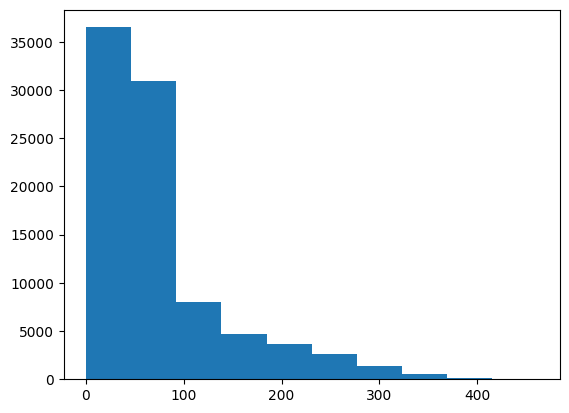

In [7]:
import matplotlib.pyplot as plt
plt.hist(cvd['avg_confidence']) # Here I created a histogram for average confidence that I created before.
plt.title

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

<ipython-input-22-81c929c3252d>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."
22,56225.0,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
27,127575529.0,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
33,4246439.0,North America,Panama,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,5047561.0,North America,Costa Rica,CRI,61801,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6545502.0,North America,Nicaragua,NIC,12520,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."


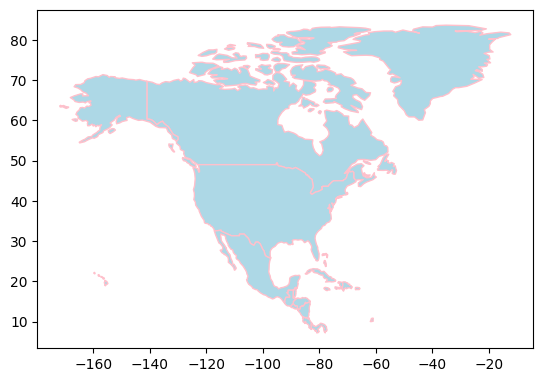

In [22]:
import geopandas as gpd
geo_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_earth = geo_earth[geo_earth['continent'] == 'North America']
axis_plot = geo_earth.plot(color='lightblue', edgecolor = 'pink' )
geo_earth
cvd_geo = gpd.GeoDataFrame(cvd,geometry = 'GeoLocation')
cvd['GeoLocation'].plot(ax=geo_earth, color = 'red')



---



## Submitting Your Work

Submit your work as usual.